# PySPICE

In [1]:
import schemdraw
import schemdraw.elements as elm

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Unit import *

from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory

## Credits:


- https://www.youtube.com/watch?v=KnA7xI7MAuI&list=PL6JL9fVjrZLcqixnvq9wUpG1xNGrIRH8j
- https://github.com/PySpice-org/PySpice/tree/master/examples
- 

## Installation

PySPICE is a utility that can perform electronics simulations in Python.  It can be installed via PIP.

In [2]:
# ! pip install pyspice

It relies on the open source application `NgSpice`, which can be installed using a utility included in PySpice.

In [3]:
# ! pyspice-post-installation --install-ngspice-dll

The installation can also be verified using the included utility.

In [4]:
# ! pyspice-post-installation --check-install

## Examples

In [5]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Unit import *


### Raw Netlist text

In [6]:
from PySpice.Spice.Netlist import Circuit

In [7]:
circuit = Circuit('Test')

# Pass raw Spice definitions to a circuit, aka netlist, content is inserted at the beginning of the netlist.
circuit.raw_spice = '''
Vinput in 0 10V
R1 in out 9kOhm'''

print(circuit)

.title Test

Vinput in 0 10V
R1 in out 9kOhm




In [8]:
# Pass element parameters as raw Spice, content is concatenated with `R2 out 0`
circuit.R(2, 'out', 0, raw_spice='1k')

print(circuit)

.title Test

Vinput in 0 10V
R1 in out 9kOhm
R2 out 0 1k



Netlist syntax in its simplest form:  
`[Component Name]` `[Input Connection]` `[Output Connection]` `[Value]`

### NetList Manipulation

We can also use PySpice to build a NetList from scratch

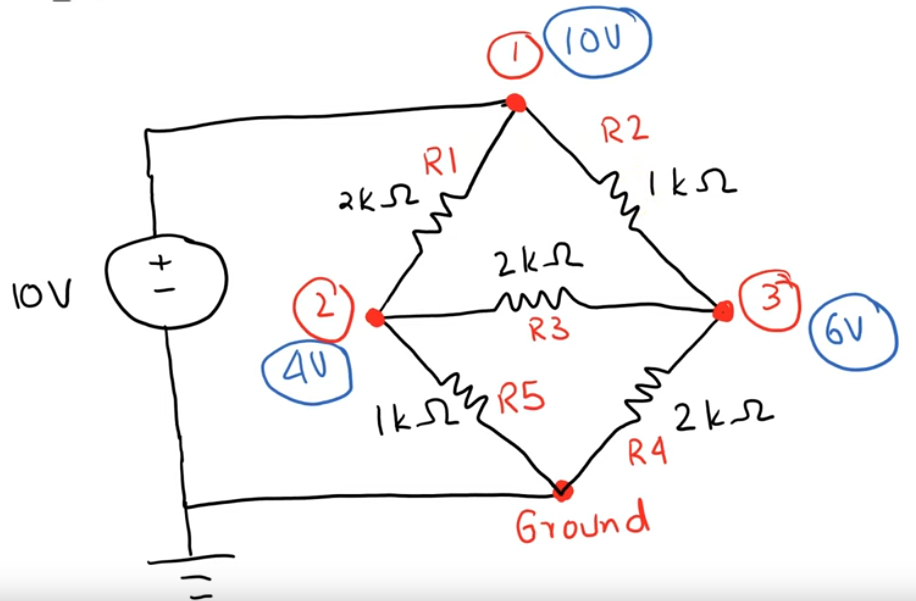

In [9]:
circuit = Circuit("Resistor Bridge")

# [ComponentMethod]([ID], [Input Connection], [Output Connection], [Value]@[Unit])
circuit.V('input', 1, circuit.gnd, 10@u_V)
circuit.R(1, 1, 2, 2@u_kOhm)
circuit.R(2, 1, 3, 1@u_kOhm)
circuit.R(3, 3, 2, 2@u_kOhm)
circuit.R(4, 3, circuit.gnd, 2@u_kOhm)
circuit.R(5, 2, circuit.gnd, 1@u_kOhm)

print(circuit)

.title Resistor Bridge
Vinput 1 0 10V
R1 1 2 2kOhm
R2 1 3 1kOhm
R3 3 2 2kOhm
R4 3 0 2kOhm
R5 2 0 1kOhm



In [10]:
simulator = circuit.simulator()
analysis = simulator.operating_point()

print(analysis.nodes.items())
print(analysis.elements.items())
print(analysis.branches)

dict_items([('3', WaveForm 3 [6.]@V), ('2', WaveForm 2 [4.]@V), ('1', WaveForm 1 [10.]@V)])
dict_items([])
{'vinput': WaveForm vinput [-0.007]@A}
